## Data Cleaning with Pandas

### Questions
- Numerical vs Categorical columns
    - How is numerical defined? 
    - When are the statistics important for these types of columns?
    - How does one handle null values and placeholders?
- How does one identify placeholders vs a legitimiate data point
- How does one filter a dataframe using conditionals? 
    - Specify rows based on conditions

### Objectives
YWBAT 
* describe and apply strategies for handling null values
* "" for handling placeholders
* "" normalizing and standardizing data
* use method chaining to store slices of data to variables
* explain the importance of method chaining
* apply the groupby method to create a new dataframe
* create a pivot table

### Outline
* Questions
* Load in our data and clean it

### Loading in super hero powers

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv("super_hero_powers.csv")
df.head()

,hero_names,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,3-D Man,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Exploratory Data Analysis

You can check some quick details for the dataframe using `df.info()`. If there aren't too many columns, you'll also get details regarding the column data type and the number of non-null entries.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Columns: 168 entries, hero_names to Omniscient
dtypes: bool(167), object(1)
memory usage: 114.1+ KB


In [7]:
df[df.columns[:10]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 10 columns):
hero_names               667 non-null object
Agility                  667 non-null bool
Accelerated Healing      667 non-null bool
Lantern Power Ring       667 non-null bool
Dimensional Awareness    667 non-null bool
Cold Resistance          667 non-null bool
Durability               667 non-null bool
Stealth                  667 non-null bool
Energy Absorption        667 non-null bool
Flight                   667 non-null bool
dtypes: bool(9), object(1)
memory usage: 11.2+ KB


### Count the null values in 'Agility' column

In [8]:
len(df[df['Agility'].isna()]) #Subset the dataframe and check it's length

0

### Print any column that has a null value

In [9]:
for column in df.columns:
    if df[column].isna().sum() > 0:
        print(column)

### Load in heros_information.csv

In [29]:
df2 = pd.read_csv("heroes_information.csv", index_col=0)
df2.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,-,bad,-99.0


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 733
Data columns (total 10 columns):
name          734 non-null object
Gender        734 non-null object
Eye color     734 non-null object
Race          734 non-null object
Hair color    734 non-null object
Height        734 non-null float64
Publisher     719 non-null object
Skin color    734 non-null object
Alignment     734 non-null object
Weight        732 non-null float64
dtypes: float64(2), object(8)
memory usage: 63.1+ KB


### What does 'object' dtype indicate?

> A: Text, dictionary

### Identify columns with null values

In [14]:
df2.isna().sum()

name           0
Gender         0
Eye color      0
Race           0
Hair color     0
Height         0
Publisher     15
Skin color     0
Alignment      0
Weight         2
dtype: int64

**Fetch the null values in the Publisher column**

In [15]:
df2[df2.Publisher.isna()==True]

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
46,Astro Boy,Male,brown,-,Black,-99.0,NaN,-,good,-99.0
86,Bionic Woman,Female,blue,Cyborg,Black,-99.0,NaN,-,good,-99.0
138,Brundlefly,Male,-,Mutant,-,193.0,NaN,-,-,-99.0
175,Chuck Norris,Male,-,-,-,178.0,NaN,-,good,-99.0
204,Darkside,-,-,-,-,-99.0,NaN,-,bad,-99.0
244,Ethan Hunt,Male,brown,Human,Brown,168.0,NaN,-,good,-99.0
263,Flash Gordon,Male,-,-,-,-99.0,NaN,-,good,-99.0
286,Godzilla,-,-,Kaiju,-,108.0,NaN,grey,bad,NaN
348,Jack Bauer,Male,-,-,-,-99.0,NaN,-,good,-99.0
354,Jason Bourne,Male,-,Human,-,-99.0,NaN,-,good,-99.0


## What would you do at this point if Publisher was important?


## Teacher Notes
* replace NaN with 'Unknown'
* delete the rows, but we lose the data
* manually input them, since there are only 15

Discuss the pros/cons of the various approaches.

In [51]:
# this is how we would manually input 'Dark Horse Comics' into the 'Astro Boy' row

df2.loc[df2.name=='Astro Boy', 'Publisher'] = 'Dark Horse Comics'

In [60]:
# you can fill nulls this way but it's better to use the .fillna method
df2.Publisher = df2.Publisher.fillna(value='Null')


## Finding Hidden Null Values

Sometime, while not explicitly missing, there are null values such as `999` hidden within a dataset. A good preliminary check is to look at the most common values for a column.

In [101]:
df2.name.value_counts().head() # you can apply a .head() to a Series object

Goliath           3
Spider-Man        3
Captain Marvel    2
Batgirl           2
Blue Beetle       2
Name: name, dtype: int64

### Use a for loop to print out the top 5 values for each column. Do you notice any suspicious entries?

In [30]:
for col in df2.columns:
    print(col,'\n', df2[col].value_counts().head(), '\n\n')

name 
 Goliath           3
Spider-Man        3
Captain Marvel    2
Blue Beetle       2
Namor             2
Name: name, dtype: int64 


Gender 
 Male      505
Female    200
-          29
Name: Gender, dtype: int64 


Eye color 
 blue     225
-        172
brown    126
green     73
red       46
Name: Eye color, dtype: int64 


Race 
 -                304
Human            208
Mutant            63
God / Eternal     14
Cyborg            11
Name: Race, dtype: int64 


Hair color 
 -          172
Black      158
Blond       99
Brown       86
No Hair     75
Name: Hair color, dtype: int64 


Height 
 -99.0     217
 183.0     59
 188.0     51
 178.0     39
 180.0     38
Name: Height, dtype: int64 


Publisher 
 Marvel Comics        388
DC Comics            215
NBC - Heroes          19
Dark Horse Comics     18
Image Comics          14
Name: Publisher, dtype: int64 


Skin color 
 -        662
green     21
blue       9
red        9
white      7
Name: Skin color, dtype: int64 


Alignment 
 good     

# Teacher Notes

Be sure students notice entries like `-` and `-99`; these should be interpreted as null values.

## Mean Height and Weight

Calculate the mean height and weight of the superheros.

In [31]:
df2[['Height', 'Weight']].mean()

Height    102.254087
Weight     43.855191
dtype: float64

## Analyzing the Impact of Null Values

How do you think the hidden null values impacted your summary statistics for height and weight above?

> A: The -99 values dramatically lowered the true mean values.

## Appropriately Flagging Null Values

While null values aren't ideal, it's good to at least be able to easily identify them. Let's look at how you could quickly replace some of those hiddnen null values.

In [32]:
df2.Height.replace(to_replace=-99.0, value=np.nan, inplace=True)

## Check that the -99 values were removed from the Height column

In [33]:
df2.Height.value_counts().head()

183.0    59
188.0    51
178.0    39
180.0    38
185.0    35
Name: Height, dtype: int64

## Replace the hidden null values in the weight column (and verify the change).

In [34]:
df2.Weight.replace(to_replace=-99.0, value=np.nan, inplace=True)

In [35]:
df2.Height.value_counts(sort=True, ascending=False).head()

183.0    59
188.0    51
178.0    39
180.0    38
185.0    35
Name: Height, dtype: int64

## Recalculate the Mean Height and Weight

In [36]:
df2[['Height', 'Weight']].mean()

Height    186.726306
Weight    112.252525
dtype: float64

### Methods for handling numerical nulls

Rather then leaving values as null, sometimes we may also wish to **impute** values by using an average value.

In [96]:
# replace with 0
df2['Height'].replace(to_replace=np.nan, value=0, inplace=True)
df2.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,0.0,Marvel Comics,-,bad,NaN


In [97]:
# replace with the mean Height
mean_height = 186.72630560928434
df2['Height'].replace(to_replace=0.0, value=mean_height, inplace=True)

df2.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.000000,Marvel Comics,-,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.000000,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.000000,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.000000,Marvel Comics,-,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,186.726306,Marvel Comics,-,bad,NaN


In [119]:
# replace with normal distribution of random numbers

mean_height = df2.Height.mean()
std_height = df2.Height.std()
num_missing = df2.Height.isna().sum()

new_values = np.random.normal(mean_height, std_height, num_missing)

df2.loc[df2.Height.isna(), 'Height'] = new_values

df2.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.000000,Marvel Comics,NaN,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.000000,Dark Horse Comics,blue,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.000000,DC Comics,red,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.000000,Marvel Comics,NaN,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,144.728494,Marvel Comics,NaN,bad,NaN


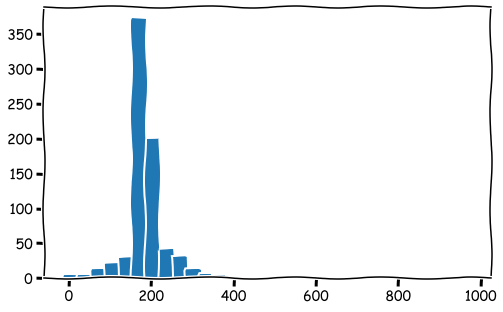

In [120]:
plt.figure(figsize=(8, 5))
plt.hist(df2.Height, bins=30)
plt.show()

### How can we filter placeholders?
- You really can't you just have to find them

In [115]:
df2["Skin color"].replace(to_replace="-", value=np.nan, inplace=True)

In [122]:
df2["Skin color"].unique() # quick scan for placeholders

array([nan, 'blue', 'red', 'black', 'grey', 'gold', 'green', 'white',
       'pink', 'silver', 'red / black', 'yellow', 'purple',
       'orange / white', 'gray', 'blue-white', 'orange'], dtype=object)

In [123]:
df2.Gender.unique()

array(['Male', 'Female', '-'], dtype=object)

In [124]:
df2["Gender"].replace(to_replace="-", value=np.nan, inplace=True)

In [125]:
df2["Eye color"].replace(to_replace="-", value=np.nan, inplace=True)

In [126]:
df2["Race"].replace(to_replace="-", value=np.nan, inplace=True)

In [127]:
df2["Hair color"].replace(to_replace="-", value=np.nan, inplace=True)

In [128]:
df2["Alignment"].replace(to_replace="-", value=np.nan, inplace=True)

### or apply replace to entire dataframe

In [141]:
df2.replace(to_replace=["-", -99.0], value=np.nan, inplace=True)

In [142]:
df2.isnull().sum()

name            0
Gender         29
Eye color     172
Race          304
Hair color    172
Height        217
Publisher      15
Skin color    662
Alignment       7
Weight        239
dtype: int64

In [143]:
# I would just drop Skin Color, because of the amount of Null values
df2 = df2.drop("Skin color", axis=1)
df2.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,bad,NaN


## Now that my dataframe is cleaned, I'm going to save it as a clean file

In [144]:
df2.to_csv("./cleaned_heroes_information.csv", index=0) 
# this will create the dataframe without that weird 'Unnamed' column

In [152]:
###

df3 = pd.read_csv("./cleaned_heroes_information.csv")
df3.head()

,name,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,bad,NaN


In [154]:
renamed_cols = [col.lower().replace(" ", "_") for col in df3.columns]
print(renamed_cols)

name_mapper = dict(zip(df3.columns, renamed_cols))

name_mapper

['name', 'gender', 'eye_color', 'race', 'hair_color', 'height', 'publisher', 'alignment', 'weight']


{'name': 'name',
 'Gender': 'gender',
 'Eye color': 'eye_color',
 'Race': 'race',
 'Hair color': 'hair_color',
 'Height': 'height',
 'Publisher': 'publisher',
 'Alignment': 'alignment',
 'Weight': 'weight'}

In [155]:
df3.rename(mapper=name_mapper, axis=1, inplace=True)
df3.head()

,name,gender,eye_color,race,hair_color,height,publisher,alignment,weight
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,good,441.0
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,good,65.0
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,good,90.0
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,bad,441.0
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,bad,NaN


In [157]:
# what are the value counts for the 'alignment' column
df3.alignment.value_counts()

good       496
bad        207
neutral     24
Name: alignment, dtype: int64

In [159]:
df3[df3.alignment.isna()]

# there is a small enough number that you could replace these manually

,name,gender,eye_color,race,hair_color,height,publisher,alignment,weight
33,Anti-Venom,Male,blue,Symbiote,Blond,229.0,Marvel Comics,NaN,358.0
110,Blackwulf,Male,red,Alien,White,188.0,Marvel Comics,NaN,88.0
138,Brundlefly,Male,NaN,Mutant,NaN,193.0,NaN,NaN,NaN
426,Man of Miracles,NaN,blue,God / Eternal,Silver,NaN,Image Comics,NaN,NaN
535,Q,Male,NaN,God / Eternal,NaN,NaN,Star Trek,NaN,NaN
676,Trickster,Male,blue,Human,Blond,183.0,DC Comics,NaN,81.0
692,Venompool,Male,NaN,Symbiote,NaN,226.0,Marvel Comics,NaN,NaN


In [165]:
df3.name.str.lower().head()

0         a-bomb
1     abe sapien
2       abin sur
3    abomination
4        abraxas
Name: name, dtype: object

### convert all lettering to lowercase

In [194]:
for column in df3.columns:
    if df3[column].dtype=='O':
        df3[column] = df3[column].str.lower()
        
df3.head()

,name,gender,eye_color,race,hair_color,height,publisher,alignment,weight
0,a-bomb,male,yellow,human,no hair,203.0,marvel comics,good,441.0
1,abe sapien,male,blue,icthyo sapien,no hair,191.0,dark horse comics,good,65.0
2,abin sur,male,blue,ungaran,no hair,185.0,dc comics,good,90.0
3,abomination,male,green,human / radiation,no hair,203.0,marvel comics,bad,441.0
4,abraxas,male,blue,cosmic entity,black,NaN,marvel comics,bad,NaN


### Let's make a column with superpowers!!!!
* column name = superpowers
* dtype = list
* list populated by strings

In [168]:
df.shape, df3.shape

((667, 168), (734, 9))

In [170]:
hero = df3.name[0]
hero

'a-bomb'

In [174]:
hero_row = df.loc[df["hero_names"].str.lower()==hero].drop('hero_names', axis=1)
hero_row

,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
1,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [187]:
hero_super_powers = []
for col in hero_row.columns:
    if hero_row[col].values[0] == True:
        hero_super_powers.append(col)

In [188]:
hero_super_powers

['Accelerated Healing',
 'Durability',
 'Longevity',
 'Super Strength',
 'Stamina',
 'Camouflage',
 'Self-Sustenance']

In [189]:
heros = {}
# {hero_name: [list of powers]}
for index, row in df.iterrows():
    powers = []
    for col in row.index[1:]:
        if row[col] == True:
            powers.append(col.lower())
    heros[row.values[0].lower()] = powers
heros

{'3-d man': ['agility', 'super strength', 'stamina', 'super speed'],
 'a-bomb': ['accelerated healing',
  'durability',
  'longevity',
  'super strength',
  'stamina',
  'camouflage',
  'self-sustenance'],
 'abe sapien': ['agility',
  'accelerated healing',
  'cold resistance',
  'durability',
  'underwater breathing',
  'marksmanship',
  'weapons master',
  'longevity',
  'intelligence',
  'super strength',
  'telepathy',
  'stamina',
  'immortality',
  'reflexes',
  'enhanced sight',
  'sub-mariner'],
 'abin sur': ['lantern power ring'],
 'abomination': ['accelerated healing',
  'intelligence',
  'super strength',
  'stamina',
  'super speed',
  'invulnerability',
  'animation',
  'super breath'],
 'abraxas': ['dimensional awareness',
  'flight',
  'intelligence',
  'super strength',
  'size changing',
  'super speed',
  'teleportation',
  'magic',
  'dimensional travel',
  'immortality',
  'invulnerability',
  'molecular manipulation',
  'energy manipulation',
  'power cosmic'],
 'a

In [196]:
powers_column = []

In [197]:
for name in df3.name:
    powers = heros.get(name, None)
    powers_column.append(powers)
powers_column

[['accelerated healing',
  'durability',
  'longevity',
  'super strength',
  'stamina',
  'camouflage',
  'self-sustenance'],
 ['agility',
  'accelerated healing',
  'cold resistance',
  'durability',
  'underwater breathing',
  'marksmanship',
  'weapons master',
  'longevity',
  'intelligence',
  'super strength',
  'telepathy',
  'stamina',
  'immortality',
  'reflexes',
  'enhanced sight',
  'sub-mariner'],
 ['lantern power ring'],
 ['accelerated healing',
  'intelligence',
  'super strength',
  'stamina',
  'super speed',
  'invulnerability',
  'animation',
  'super breath'],
 ['dimensional awareness',
  'flight',
  'intelligence',
  'super strength',
  'size changing',
  'super speed',
  'teleportation',
  'magic',
  'dimensional travel',
  'immortality',
  'invulnerability',
  'molecular manipulation',
  'energy manipulation',
  'power cosmic'],
 ['cold resistance',
  'durability',
  'energy absorption',
  'super strength',
  'invulnerability',
  'elemental transmogrification',

In [198]:
df3["superpowers"] = powers_column
df3.head()

,name,gender,eye_color,race,hair_color,height,publisher,alignment,weight,superpowers
0,a-bomb,male,yellow,human,no hair,203.0,marvel comics,good,441.0,"[accelerated healing, durability, longevity, s..."
1,abe sapien,male,blue,icthyo sapien,no hair,191.0,dark horse comics,good,65.0,"[agility, accelerated healing, cold resistance..."
2,abin sur,male,blue,ungaran,no hair,185.0,dc comics,good,90.0,[lantern power ring]
3,abomination,male,green,human / radiation,no hair,203.0,marvel comics,bad,441.0,"[accelerated healing, intelligence, super stre..."
4,abraxas,male,blue,cosmic entity,black,NaN,marvel comics,bad,NaN,"[dimensional awareness, flight, intelligence, ..."


### Histogram

In [203]:
males = df3[df3.gender == 'male']
females = df3[df3.gender == 'female']

In [204]:
def plot_sns_hist(df, col):
    plt.figure(figsize=(8, 5))
    plt.grid()
    sns.distplot(df[col].dropna(), bins=20)
    plt.show()

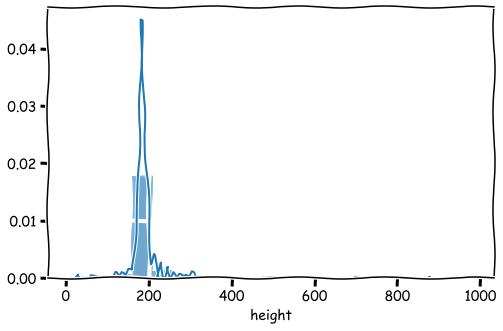

In [205]:
plot_sns_hist(males, 'height')

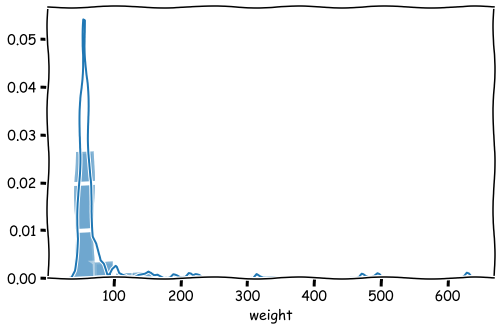

In [206]:
plot_sns_hist(females, 'weight')

### Assessment

### What did I learn?

I learned...
- that the replace function allows you to replace values in either the dataframe or a series of the dataframe
- you can search/group information based on data types by pulling the column then searching in the series
- null values can be used in ways that are meaningful, they aren't always bad. 

## Appendix

### Gathering columns of similar data types

In [15]:
all_boolean_columns = []

for column in df.columns:
    if df[column].dtype != bool:
        all_boolean_columns.append(column)

        
all_boolean_columns

['hero_names']

In [6]:
for column in df.columns:
    if df[column].dtype == bool:
        continue
    else:
        print(column)

hero_names
